In [1]:
import os
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# filepath = Path(__file__).parent
filepath = Path(os.path.abspath(''))
print(filepath)

canc_col_name = "improve_sample_id"
drug_col_name = "improve_chem_id"

source = "CTRPv2"
target = "PDMR"

def check_dups(df):
    tt = df[df.duplicated(keep=False)]
    assert tt.shape[0] == 0, "found duplicates"

/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP


In [2]:
plots_outdir = filepath / "plots_outdir"

all_preds_file_list = sorted(plots_outdir.glob("agg_preds_*.tsv"))
# print(all_preds_file_list)
dfs = []
for f in all_preds_file_list:
    if 'all_models' in str(f):
        continue
    print(f)
    # str(f).split("agg_preds_")[1]
    df = pd.read_csv(f, sep="\t")
    check_dups(df)
    # l0 = df.shape[0]
    # df = df.drop_duplicates()
    # l1 = df.shape[0]
    # assert l0 == l1, "mismatch"
    dfs.append(df)

aa = pd.concat(dfs, axis=0)
aa.to_csv(plots_outdir / "agg_preds_all_models.tsv", sep="\t", index=False)
# aa

/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP/plots_outdir/agg_preds_DeepTTC_CTRPv2_PDMR.tsv
/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP/plots_outdir/agg_preds_GraphDRP_CTRPv2_PDMR.tsv
/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP/plots_outdir/agg_preds_HIDRA_CTRPv2_PDMR.tsv
/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP/plots_outdir/agg_preds_IGTD_CTRPv2_PDMR.tsv
/Users/apartin/Library/CloudStorage/Box-Box/AP_work/Proposals/Ovarian/GraphDRP/plots_outdir/agg_preds_PaccMann_MCA_CTRPv2_PDMR.tsv


In [3]:
# df = aa[aa[canc_col_name].isin(['655913~031-T'])].sort_values(['model', 'drug_name']).reset_index(drop=True)  # get specific pdo
df = aa[aa[canc_col_name].isin(['655913~031-T'])].sort_values(['drug_name', 'model']).reset_index(drop=True)  # get specific pdo
# print(df.shape)
# df[:10]
df1 = df[["drug_name", "model", "pred_mean"]].reset_index(drop=True)   # cols subset
print(df1.shape)
df1.to_csv(plots_outdir / "pdo0_agg_preds_all_models.tsv", sep="\t", index=False)
df1[:7]


(80, 3)


,drug_name,model,pred_mean
0,Carboplatin,DeepTTC,1.000000
1,Carboplatin,GraphDRP,0.936580
2,Carboplatin,HIDRA,0.958400
3,Carboplatin,IGTD,0.969219
4,Carboplatin,PaccMann_MCA,0.972100
5,Cisplatin,DeepTTC,1.000300
6,Cisplatin,GraphDRP,0.957780


In [4]:
# drug_sub = ["Docetaxel", "Paclitaxel", "Melphalan", "Olaparib"]
# df1 = df1[df1["drug_name"].isin(drug_sub)].sort_values(['drug_name', 'model']).reset_index(drop=True)
# df1

In [5]:
#    df_pivot = df.pivot(index='drug_name', columns=canc_col_name, values=['pred_mean', 'pred_std'])
df_piv = df1.pivot(index='drug_name', columns='model', values=['pred_mean'])
df_piv

pred_mean                                        
model              DeepTTC GraphDRP   HIDRA      IGTD PaccMann_MCA
drug_name                                                         
Carboplatin         1.0000  0.93658  0.9584  0.969219       0.9721
Cisplatin           1.0003  0.95778  0.9359  0.886613       0.9726
Cyclophosphamide    0.9994  0.96372  0.9500  0.944843       0.9719
Docetaxel           0.8319  0.51446  0.6806  0.499011       0.7942
Doxorubicin         0.7590  0.58945  0.7554  0.708539       0.8349
Etoposide           0.9463  0.76977  0.8928  0.868064       0.7986
Gemcitabine         0.9830  0.60308  0.8752  0.882712       0.8869
Letrozole           0.9815  0.81146  0.8500  0.820877       0.9556
Melphalan           0.9709  0.88171  0.9360  0.911397       0.9569
Niraparib           0.9965  0.82627  0.9370  0.872817       0.9142
Olaparib            0.9903  0.88716  0.9407  0.944088       0.9103
Paclitaxel          0.8550  0.51168  0.6924  0.497837       0.8465
Rucaparib           0.9942  0.78132  0.9214  0.832828       0.9164
Tamoxifen           0.9989  0.90785  0.9229  0.888960       0.8409
Thiotepa            0.9864  0.88901  0.9500  0.699289       0.9691
Topotecan           0.8485  0.60875  0.8393  0.699117       0.8528

In [6]:
df=df1
fpath=filepath / f'pdmr_trained_{source}.png'
tr_data=source
errorbar=False
show=True

In [7]:
# Pivot the DataFrame
# df_pivot = df.pivot(index=drug_col_name, columns=canc_col_name, values=['pred_mean', 'pred_std'])
df_pivot = df.pivot(index='drug_name', columns='model', values=['pred_mean'])
df_pivot.head()

pred_mean                                        
model              DeepTTC GraphDRP   HIDRA      IGTD PaccMann_MCA
drug_name                                                         
Carboplatin         1.0000  0.93658  0.9584  0.969219       0.9721
Cisplatin           1.0003  0.95778  0.9359  0.886613       0.9726
Cyclophosphamide    0.9994  0.96372  0.9500  0.944843       0.9719
Docetaxel           0.8319  0.51446  0.6806  0.499011       0.7942
Doxorubicin         0.7590  0.58945  0.7554  0.708539       0.8349

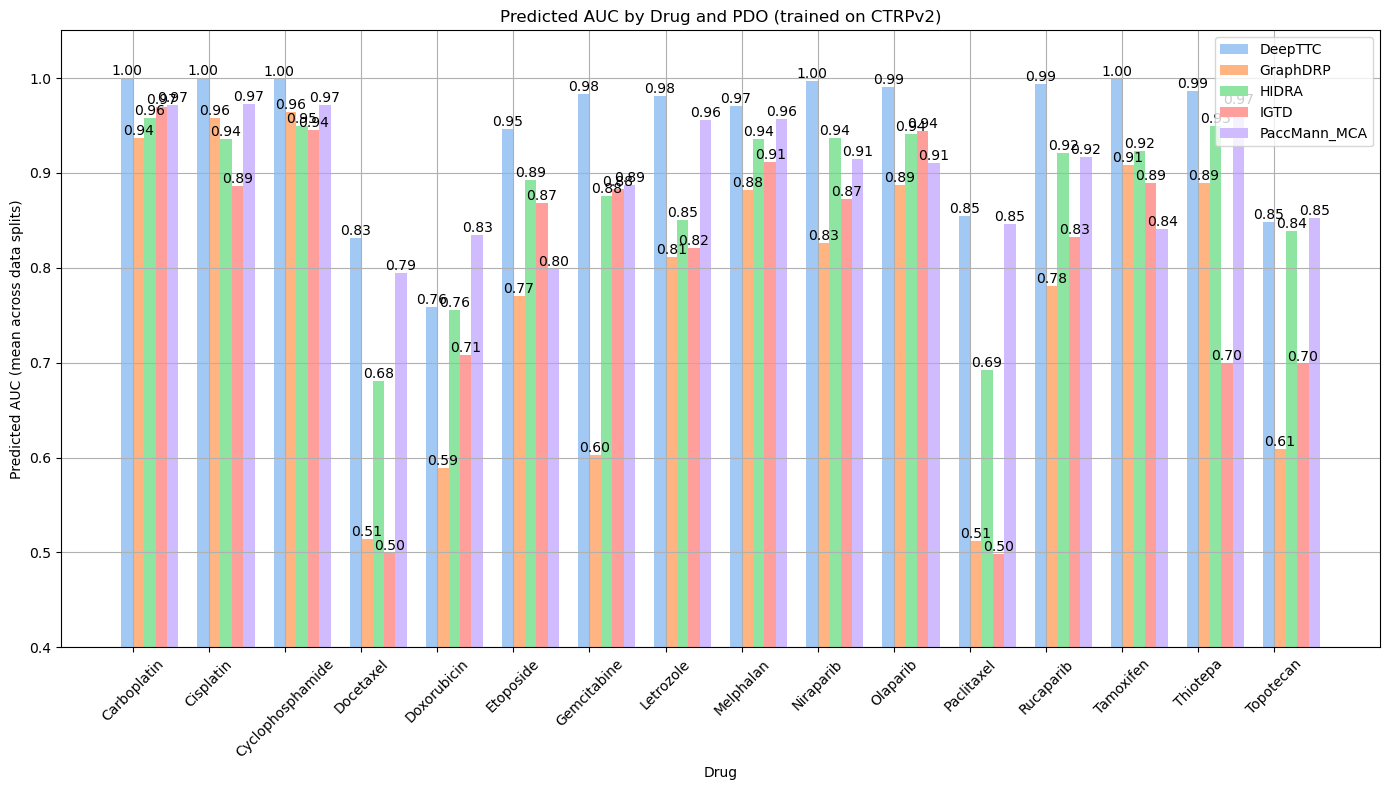

In [8]:
# Plotting
fig, ax = plt.subplots(figsize=(14, 8))

# Get the number of drugs and cells
# drugs = df[drug_col_name].unique()
drugs = df['drug_name'].unique()
models = df['model'].unique()
# bar_width = 0.4  # Width of the bars
bar_width = 0.15  # Width of the bars
index = np.arange(len(drugs))  # The label locations

colors = sns.color_palette("pastel")

# Plot each cell
for i, (model, color) in enumerate(zip(models, colors)):
    pred_mean = df_pivot['pred_mean'][model].values
    # pred_std = df_pivot['pred_std'][model].values
    if errorbar:
        bars = ax.bar(index + i * bar_width, pred_mean, bar_width, yerr=pred_std,
                        label=model, color=color, capsize=5, ecolor='black',
                        error_kw=dict(linestyle='--', linewidth=1))
        title = f'Predicted AUC and Standard Deviation by Drug and PDO (trained on {tr_data})'
    else:
        bars = ax.bar(index + i * bar_width, pred_mean, bar_width, label=model,
                        color=color, capsize=5, ecolor='black')
        title = f'Predicted AUC by Drug and PDO (trained on {tr_data})'

    # Add annotations
    for bar, mean in zip(bars, pred_mean):
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval, f'{mean:.2f}', ha='center', va='bottom')

# Add labels, title, and legend
ax.set_xlabel('Drug')
ax.set_ylabel('Predicted AUC (mean across data splits)')
ax.set_title(title)
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(drugs, rotation=45)
ax.legend()
ax.grid()

ax.set_ylim(0.4, None)

plt.tight_layout()

# Save the plot to a file
# plt.savefig(fpath, dpi=300)
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Create the DataFrame
data = {
    'drug_name': ['Carboplatin', 'Carboplatin', 'Carboplatin', 'Carboplatin', 'Carboplatin', 'Cisplatin', 'Cisplatin', 'Cisplatin', 'Cisplatin', 'Cisplatin', 'Cyclophosphamide', 'Cyclophosphamide', 'Cyclophosphamide', 'Cyclophosphamide', 'Cyclophosphamide', 'Docetaxel', 'Docetaxel', 'Docetaxel', 'Docetaxel', 'Docetaxel', 'Doxorubicin', 'Doxorubicin', 'Doxorubicin', 'Doxorubicin', 'Doxorubicin', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Gemcitabine', 'Gemcitabine', 'Gemcitabine', 'Gemcitabine', 'Gemcitabine', 'Letrozole', 'Letrozole', 'Letrozole', 'Letrozole', 'Letrozole', 'Melphalan', 'Melphalan', 'Melphalan', 'Melphalan', 'Melphalan', 'Niraparib', 'Niraparib', 'Niraparib', 'Niraparib', 'Niraparib', 'Olaparib', 'Olaparib', 'Olaparib', 'Olaparib', 'Olaparib', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Rucaparib', 'Rucaparib', 'Rucaparib', 'Rucaparib', 'Rucaparib', 'Tamoxifen', 'Tamoxifen', 'Tamoxifen', 'Tamoxifen', 'Tamoxifen', 'Thiotepa', 'Thiotepa', 'Thiotepa', 'Thiotepa', 'Thiotepa', 'Topotecan', 'Topotecan', 'Topotecan', 'Topotecan', 'Topotecan'],
    'model': ['DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA'],
    'pred_mean': [1.0, 0.93658, 0.9584, 0.96921855, 0.9721, 1.0003, 0.95778, 0.9359, 0.8866127, 0.9726, 0.9994, 0.96372, 0.95, 0.94484276, 0.9719, 0.8319, 0.51446, 0.6806, 0.4990109, 0.7942, 0.759, 0.58945, 0.7554, 0.7085388, 0.8349, 0.9463, 0.76977, 0.8928, 0.8680641, 0.7986, 0.983, 0.60308, 0.8752, 0.88271207, 0.8869, 0.9815, 0.81146, 0.85, 0.82087743, 0.9556, 0.9709, 0.88171, 0.936, 0.9113975, 0.9569, 0.9965, 0.82627, 0.937, 0.87281656, 0.9142, 0.9903, 0.88716, 0.9407, 0.94408816, 0.9103, 0.855, 0.51168, 0.6924, 0.497837, 0.8465, 0.9942, 0.78132, 0.9214, 0.83282787, 0.9164, 0.9989, 0.90785, 0.9229, 0.88896, 0.8409, 0.9864, 0.88901, 0.95, 0.6992891, 0.9691, 0.8485, 0.60875, 0.8393, 0.6991168, 0.8528]
}

df = pd.DataFrame(data)

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 10))

# Set the width of each bar and the positions of the bars
width = 0.15
x = range(len(df['drug_name'].unique()))

# Create the grouped bar plot
for i, model in enumerate(['DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA']):
    data = df[df['model'] == model]
    ax.bar([xi + i*width for xi in x], data['pred_mean'], width, label=model)

# Customize the plot
ax.set_ylabel('Prediction Mean')
ax.set_title('Drug Prediction Comparison Across Models')
ax.set_xticks([xi + 2*width for xi in x])
ax.set_xticklabels(df['drug_name'].unique(), rotation=45, ha='right')
ax.legend()

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Create the DataFrame
data = {
    'drug_name': ['Carboplatin', 'Carboplatin', 'Carboplatin', 'Carboplatin', 'Carboplatin', 'Cisplatin', 'Cisplatin', 'Cisplatin', 'Cisplatin', 'Cisplatin', 'Cyclophosphamide', 'Cyclophosphamide', 'Cyclophosphamide', 'Cyclophosphamide', 'Cyclophosphamide', 'Docetaxel', 'Docetaxel', 'Docetaxel', 'Docetaxel', 'Docetaxel', 'Doxorubicin', 'Doxorubicin', 'Doxorubicin', 'Doxorubicin', 'Doxorubicin', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Etoposide', 'Gemcitabine', 'Gemcitabine', 'Gemcitabine', 'Gemcitabine', 'Gemcitabine', 'Letrozole', 'Letrozole', 'Letrozole', 'Letrozole', 'Letrozole', 'Melphalan', 'Melphalan', 'Melphalan', 'Melphalan', 'Melphalan', 'Niraparib', 'Niraparib', 'Niraparib', 'Niraparib', 'Niraparib', 'Olaparib', 'Olaparib', 'Olaparib', 'Olaparib', 'Olaparib', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Paclitaxel', 'Rucaparib', 'Rucaparib', 'Rucaparib', 'Rucaparib', 'Rucaparib', 'Tamoxifen', 'Tamoxifen', 'Tamoxifen', 'Tamoxifen', 'Tamoxifen', 'Thiotepa', 'Thiotepa', 'Thiotepa', 'Thiotepa', 'Thiotepa', 'Topotecan', 'Topotecan', 'Topotecan', 'Topotecan', 'Topotecan'],
    'model': ['DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA', 'DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA'],
    'pred_mean': [1.0, 0.93658, 0.9584, 0.96921855, 0.9721, 1.0003, 0.95778, 0.9359, 0.8866127, 0.9726, 0.9994, 0.96372, 0.95, 0.94484276, 0.9719, 0.8319, 0.51446, 0.6806, 0.4990109, 0.7942, 0.759, 0.58945, 0.7554, 0.7085388, 0.8349, 0.9463, 0.76977, 0.8928, 0.8680641, 0.7986, 0.983, 0.60308, 0.8752, 0.88271207, 0.8869, 0.9815, 0.81146, 0.85, 0.82087743, 0.9556, 0.9709, 0.88171, 0.936, 0.9113975, 0.9569, 0.9965, 0.82627, 0.937, 0.87281656, 0.9142, 0.9903, 0.88716, 0.9407, 0.94408816, 0.9103, 0.855, 0.51168, 0.6924, 0.497837, 0.8465, 0.9942, 0.78132, 0.9214, 0.83282787, 0.9164, 0.9989, 0.90785, 0.9229, 0.88896, 0.8409, 0.9864, 0.88901, 0.95, 0.6992891, 0.9691, 0.8485, 0.60875, 0.8393, 0.6991168, 0.8528]
}

df = pd.DataFrame(data)

# Calculate average pred_mean for each drug and sort
drug_avg = df.groupby('drug_name')['pred_mean'].mean().sort_values(ascending=False)
drug_order = drug_avg.index

# Set up the plot
fig, ax = plt.subplots(figsize=(20, 12))

# Set the width of each bar and the positions of the bars
width = 0.15
x = range(len(drug_order))

# Create the grouped bar plot
for i, model in enumerate(['DeepTTC', 'GraphDRP', 'HIDRA', 'IGTD', 'PaccMann_MCA']):
    data = df[df['model'] == model].set_index('drug_name').loc[drug_order]
    bars = ax.bar([xi + i*width for xi in x], data['pred_mean'], width, label=model)
    
    # Add text labels
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}', ha='center', va='bottom', rotation=90, fontsize=8)

# Customize the plot
ax.set_ylabel('Prediction Mean', fontsize=12)
ax.set_xlabel('Drug Name', fontsize=12)
ax.set_title('Drug Prediction Comparison Across Models', fontsize=16)
ax.set_xticks([xi + 2*width for xi in x])
ax.set_xticklabels(drug_order, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=10)

# Add grid
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# Set y-axis limits
ax.set_ylim(0, 1.1)

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()